2024/07/13

# Bezier曲線
- $N$ 個の制御点 ${\mathbf x}_i (i=0, \ldots, N-1)$ を結んでできるポリゴンを丸めたような曲線を $N-1$ 次のBezier曲線という．
- 曲線上の各点 ${\mathbf x}'(t) \ (t \in [0, 1])$ は，全制御点の線形和 ${\mathbf x}'(t) = \sum_{i=0}^{N-1} B_{N-1, i}(t) {\mathbf x}_i$ で計算される．
  - Bernstein係数 $B_{n, i}(t) = \binom{n}{i} t^i (1-t)^{n-i}$

ここでは星型 $n$ 角形 (厳密には凹凸が交互にある $2n$ 角形) の凹部分(鈍角)/凸部分(鋭角)をそれぞれ曲線化してみる．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "cm"

(-1.0, 1.0, -1.0, 1.0)

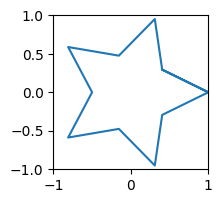

In [2]:
# 対象図形
n = 5   # n芒星
r = 0.5 # 外側n角形の半径を1としたときの内側n角形の半径の比率
x = np.array([(1, r)[i%2] * np.exp(i/n*np.pi*1j) for i in range(2*n+2)])    # 制御点列 (複素数)

plt.figure(figsize=(2, 2))
plt.plot(x.real, x.imag)
plt.axis((-1, 1, -1, 1))

In [3]:
# 内挿点計算

def factorial(n):
    return n * factorial(n-1) if n > 1 else 1

def binom(n, k):
    return factorial(n) / (factorial(k) * factorial(n-k))

def bernstein(n, i, t):
    return binom(n, i) * t**i * (1-t)**(n-i)

def bezier_interp(x, T=10): # Bezier内挿1回分
    N = len(x)
    t = np.linspace(0, 1, T)
    return np.sum([bernstein(N-1, i, t) * x[i] for i in range(N)], axis=0)

Text(0, 0.5, '$B_{n, i}[t]$')

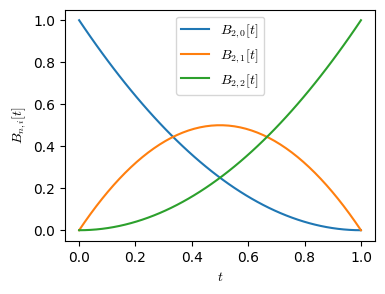

In [4]:
# 各制御点に対するBernstein係数の変化
N = 3   # 制御点数
t = np.linspace(0, 1)   # 媒介変数

plt.figure(figsize=(4, 3))
for i in range(N):
    plt.plot(t, bernstein(N-1, i, t), label=f"$B_{{{N-1}, {i}}}[t]$")
plt.legend()
plt.xlabel(f"$t$")
plt.ylabel(f"$B_{{n, i}}[t]$")

(-1.0, 1.0, -1.0, 1.0)

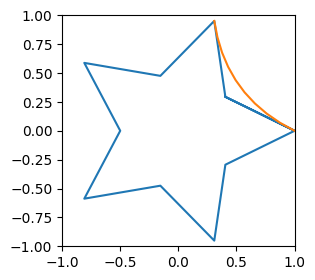

In [5]:
# 最初の鈍角だけBezier曲線にしてみる
N = 3
x_interp_convex = bezier_interp(x[:N])

plt.figure(figsize=(3, 3))
plt.plot(x.real, x.imag)
plt.plot(x_interp_convex.real,  x_interp_convex.imag)
plt.axis((-1, 1, -1, 1))

(-1.0, 1.0, -1.0, 1.0)

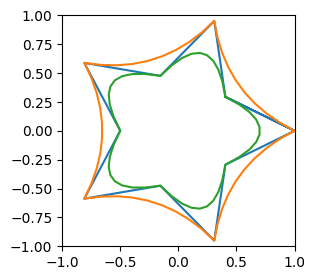

In [6]:
# 凸部分n個のBezier曲線，凹部分n個のBezier曲線
x_interp_convex  = np.concatenate([bezier_interp(x[i:i+3]) for i in range(0, 2*n, 2)])
x_interp_concave = np.concatenate([bezier_interp(x[i:i+3]) for i in range(1, 2*n, 2)])

plt.figure(figsize=(3, 3))
plt.plot(x.real, x.imag)
plt.plot(x_interp_convex.real,  x_interp_convex.imag)
plt.plot(x_interp_concave.real, x_interp_concave.imag)
plt.axis((-1, 1, -1, 1))

(-1.0, 1.0, -1.0, 1.0)

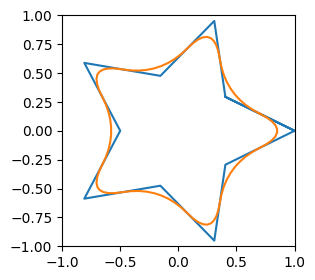

In [7]:
# 凹凸同時に丸めたければ，各線分の中点に制御点を追加し，そこを端点として内挿すれば良い
x_halfway = (x + np.roll(x, -1)) / 2
x2 = np.stack([x, x_halfway], axis=1).flatten()
x_interp = np.concatenate([bezier_interp(x2[i:i+3]) for i in range(1, 4*n, 2)])

plt.figure(figsize=(3, 3))
plt.plot(x.real, x.imag)
plt.plot(x_interp.real, x_interp.imag)
plt.axis((-1, 1, -1, 1))

ちなみに，3次Bezierの制御点を重ねた疑似2次Beizerは2次Bezierとは異なる．

中点2つを使うのも違う．

(-1.0, 1.0, -1.0, 1.0)

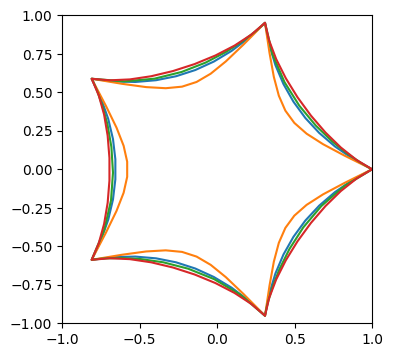

In [40]:
x_interp_convex  = np.concatenate([bezier_interp( x[i:i+3])             for i in range(0, 2*n, 2)]) # 2次Bezier
x_interp_convex2 = np.concatenate([bezier_interp( x[[i,i+1,i+1,i+2]])   for i in range(0, 2*n, 2)]) # 真ん中を重複
x_interp_convex3 = np.concatenate([bezier_interp( x[[i,i  ,i+1,i+2]])   for i in range(0, 2*n, 2)]) # 1つ目を重複
x_interp_convex4 = np.concatenate([bezier_interp(x2[[i,i+1,i+3,i+4]])   for i in range(0, 4*n, 4)]) # 中点2つで3次Bezier

plt.figure(figsize=(4, 4))
# plt.plot(x.real, x.imag)
plt.plot(x_interp_convex.real,  x_interp_convex.imag)   # 青: 2次Bezier
plt.plot(x_interp_convex2.real,  x_interp_convex2.imag) # 橙: 真ん中を重複
plt.plot(x_interp_convex3.real,  x_interp_convex3.imag) # 緑: 1つ目を重複
plt.plot(x_interp_convex4.real,  x_interp_convex4.imag) # 赤: 中点2つで3次Bezier
plt.axis((-1, 1, -1, 1))